In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,77,49,42,20.879744,82.002744,6.502985,202.935536,rice
1,89,55,41,21.770462,80.319644,7.038096,226.655537,rice
2,98,56,37,23.004459,82.320763,7.840207,263.964248,rice
3,78,41,42,26.491096,80.158363,6.980401,242.864034,rice
4,81,42,37,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,106,19,35,26.774637,66.413269,6.780064,177.774507,coffee
2196,88,35,32,27.417112,56.636362,6.086922,127.924610,coffee
2197,85,16,34,24.131797,67.225123,6.362608,173.322839,coffee
2198,100,37,30,26.272418,52.127394,6.758793,127.175293,coffee
2199,90,27,31,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

maize          100
banana         100
grapes         100
mungbean       100
pomegranate    100
lentil         100
watermelon     100
blackgram      100
mango          100
apple          100
coffee         100
muskmelon      100
rice           100
mothbeans      100
kidneybeans    100
coconut        100
cotton         100
orange         100
pigeonpeas     100
jute           100
chickpea       100
papaya         100
Name: label, dtype: int64

<AxesSubplot:>

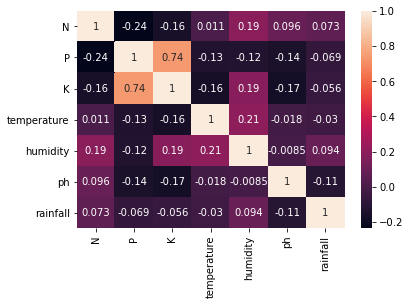

In [11]:
sns.heatmap(df.corr(),annot=True)

<h3>Seperating features and target label</h3>

In [35]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [77]:
#accuracy and model name
acc = []
model = []

In [37]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

<h2>Decision tree</h2>

In [78]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Decision Tree')         #model name
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.68181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.92      1.00      0.96        23
       maize       0.83      0.95      0.89        21
       mango       1.00      0.85      0.92        26
   mothbeans       1.00      0.47      0.64        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [79]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.92954545, 0.91136364, 0.91818182, 0.93409091, 0.94090909])

<b>Saving the trained Decision tree model</b>

In [80]:
DT_pkl = open('./models/DecisionTree.pkl', 'wb')
pickle.dump(DecisionTree, DT_pkl)
DT_pkl.close()

<h2>Guassian Naive Bayes</h2>

In [81]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Naive Bayes')           #model name
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [82]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99318182, 0.99090909, 0.99090909])

<b>Saving the trained Naive Bayes model</b>

In [83]:
NB_pkl = open('./models/NaiveBayes.pkl', 'wb')
pickle.dump(NaiveBayes, NB_pkl)
NB_pkl.close()

<h2>Support Vector Machine (SVM)</h2>

In [84]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

SVM = SVC(C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('SVM')                   #model name
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       0.93      1.00      0.96        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [85]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98636364, 0.98409091, 0.975     , 0.97954545, 0.97045455])

<b>Saving the trained SVM model</b>

In [86]:
SVM_pkl = open('./models/SVMClassifier.pkl', 'wb')
pickle.dump(SVM, SVM_pkl)
SVM_pkl.close()

<h2>Random Forest</h2>

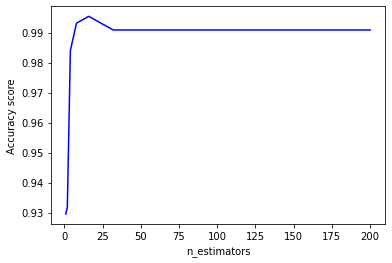

In [87]:
from sklearn.ensemble import RandomForestClassifier
acc_score = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=2)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)

    x = metrics.accuracy_score(Ytest, predicted_values)
    acc_score.append(x) 
    
plt.plot(n_estimators, acc_score, 'b', label='Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()                      

In [88]:
acc_score

[0.9295454545454546,
 0.9318181818181818,
 0.9840909090909091,
 0.9931818181818182,
 0.9954545454545455,
 0.990909090909091,
 0.990909090909091,
 0.990909090909091,
 0.990909090909091]

In [89]:
RF = RandomForestClassifier(n_estimators=16, random_state=2)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('RF')                   #model name
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.97      1.00      0.98        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [90]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 1.        , 0.99090909, 0.99545455, 0.98636364])

<b>Saving the trained Random Forest model</b>

In [91]:
RF_pkl = open('./models/RandomForest.pkl', 'wb')
pickle.dump(RF, RF_pkl)
RF_pkl.close()

<h2>K-Nearest Neighbour</h2>

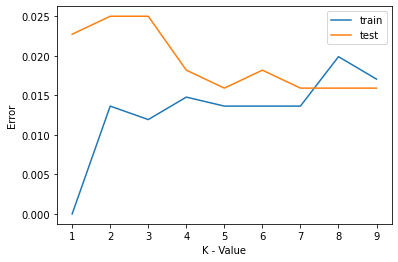

In [98]:
from sklearn.neighbors import KNeighborsClassifier 
error1=[]
error2=[]
for k in range(1,10):
  k_nn = KNeighborsClassifier(n_neighbors=k)
  k_nn.fit(Xtrain,Ytrain)
  y_pred1 = k_nn.predict(Xtrain)
  error1.append(np.mean(Ytrain!=y_pred1))
  y_pred2 = k_nn.predict(Xtest)
  error2.append(np.mean(Ytest!=y_pred2))
plt.plot(range(1,10),error1,label='train')
plt.plot(range(1,10),error2,label='test')
plt.xlabel('K - Value')
plt.ylabel('Error')
plt.legend()

In [92]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_norm,Ytrain)
predicted_values = knn.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('KNN')                   #model name
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.9681818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      0.96      0.94        23
       maize       1.00      0.95      0.98        21
       mango       0.87      1.00      0.93        26
   mothbeans       1.00      0.74      0.85        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [93]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 1.        , 0.99090909, 0.99545455, 0.98636364])

<b>Saving the trained Random Forest model</b>

In [94]:
KNN_pkl = open('./models/KNN.pkl', 'wb')
pickle.dump(knn, KNN_pkl)
KNN_pkl.close()

<h2>Comparing models</h2>

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

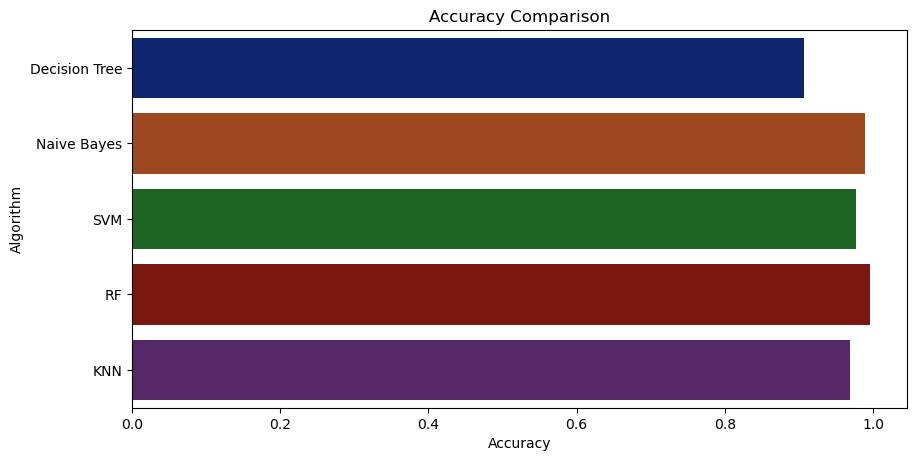

In [95]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [96]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9068181818181819
Naive Bayes --> 0.9886363636363636
SVM --> 0.9772727272727273
RF --> 0.9954545454545455
KNN --> 0.9681818181818181


In [100]:
#['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
data = np.array([[77,49,42,20,82,6.5,202]])
prediction = RF.predict(data)
print(prediction)

['rice']
